In [1]:
%matplotlib notebook
import numpy as np
import sigpy as sp
import sigpy.plot as pl
import cupy as cp
import scipy.io
import math
from scipy.sparse import csc_matrix
import numpy.matlib
import matplotlib.pyplot as plt
import dynamicrecon
import bart
%load_ext autoreload
%autoreload 2

In [2]:
cp.cuda.Device(2).use()

In [3]:
M = np.load("../../patchwise_dynamic_recon_data/M0_fista_0_05.npy")
C = cp.load("../../patchwise_dynamic_recon_data/C0_fista_0_05.npy")

In [4]:
Converge_fista = np.load("../../patchwise_dynamic_recon_data/converge_fista_0_02.npy")
Converge_ista = np.load("../../patchwise_dynamic_recon_data/converge_ista_0_02.npy")

In [5]:
Converge_fista[-1]

array(12.38788023)

<IPython.core.display.Javascript object>


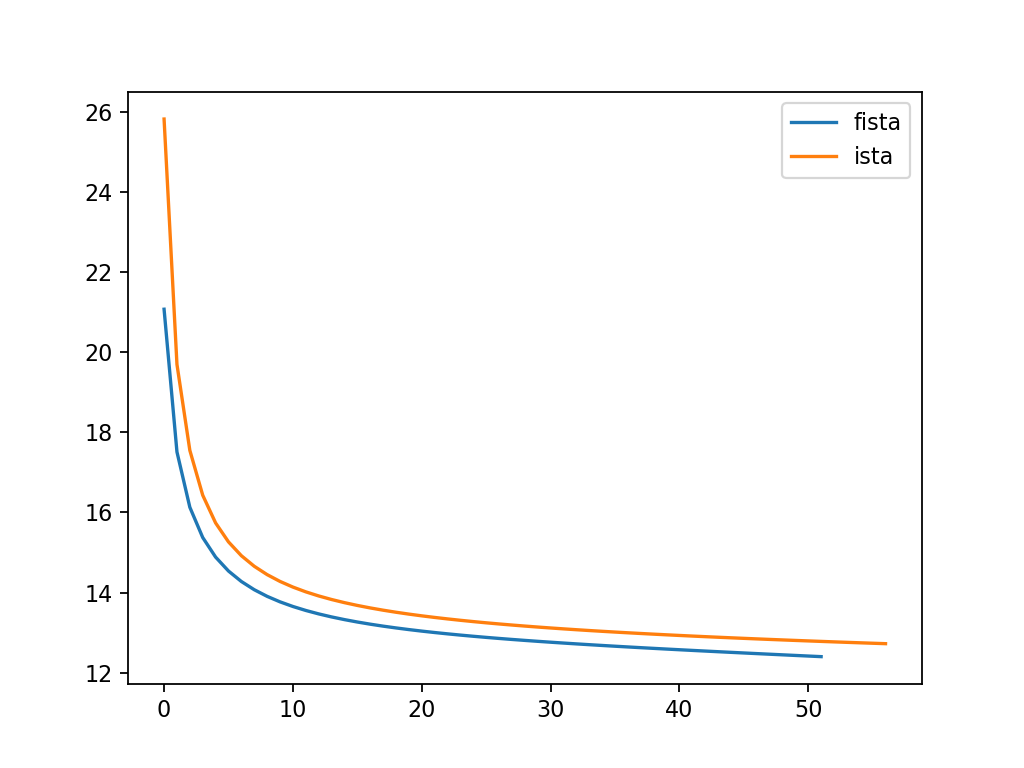

In [6]:
plt.figure()
plt.plot(Converge_fista[20::20])
plt.plot(Converge_ista[20::20])
plt.legend(["fista","ista"])
plt.show()

<IPython.core.display.Javascript object>


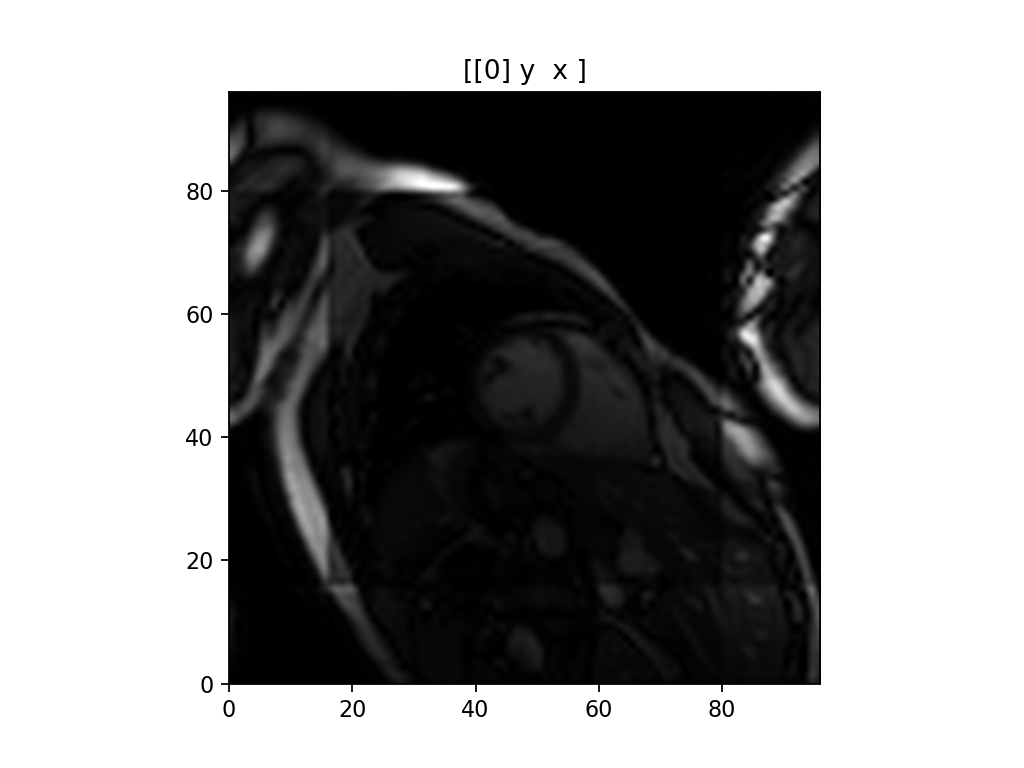

In [7]:
pl.ImagePlot(C)

In [8]:
Im = dynamicrecon.modelCforward(C=C,M=M)
Im = Im/abs(Im).mean(axis=(1,2))[:,None,None]

In [9]:
# load the cardiac data
cardiac_images = scipy.io.loadmat("images.mat")
imgs = cardiac_images["LplusS"]
# imgs=imgs[87:183,65:161,:]
# imgs = imgs.transpose(2,0,1)
imgs = cp.array(imgs)
# down sample images
imgs_lowres = sp.ifft(sp.fft(imgs,axes=(0,1))[128-48:128+48,128-48:128+48,:],axes=(0,1)).transpose(2,0,1)[:,::-1,::-1]
imgs_lowres = imgs_lowres/abs(imgs_lowres).mean(axis=(1,2))[:,None,None]

<IPython.core.display.Javascript object>


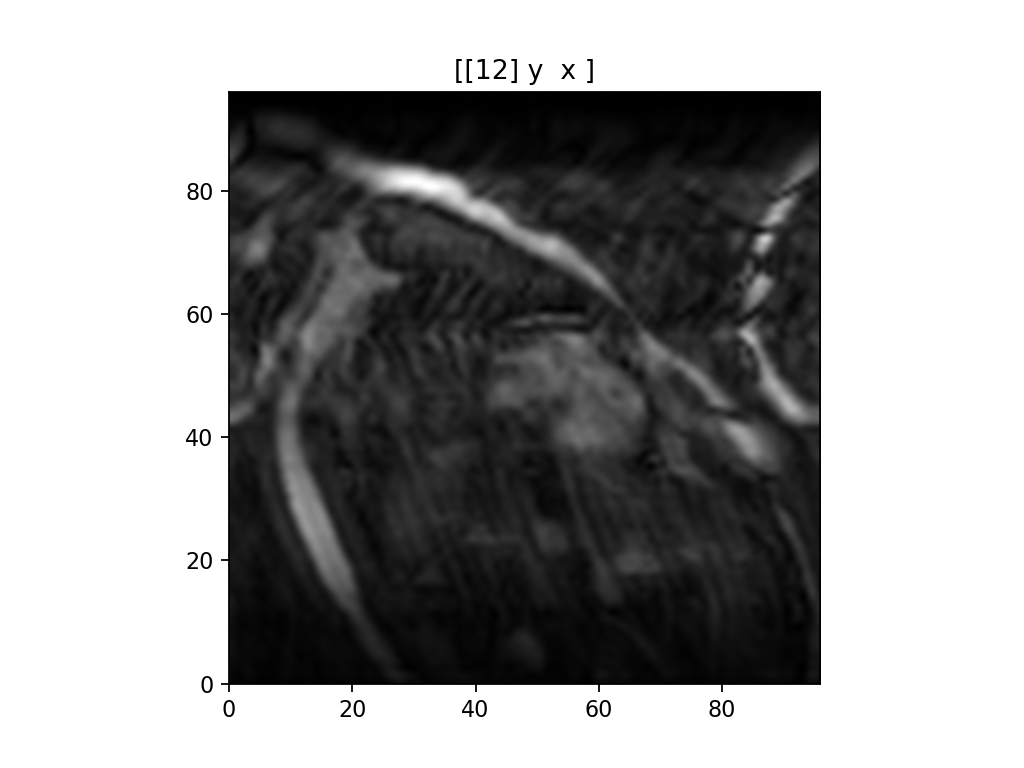

In [70]:
#perform pics
kspace = scipy.io.loadmat("cardiac_cine_R6.mat")
sensmaps = kspace["b1"][::-1,::-1]
raw_data = kspace["kdata"]


# Crop the ksapce
raw_data_lowres = raw_data[128-48:128+48,128-48:128+48,:,:]
# raw_data_lowres = P1
mask_lowres = abs(raw_data_lowres)>0
im_lowres = sp.rss(sp.ifft(raw_data_lowres,axes=(0,1)),axes=3).transpose(2,0,1)
im_lowres = cp.array(im_lowres/abs(im_lowres).mean(axis=(1,2))[:,None,None])
pl.ImagePlot(im_lowres)

# sens_kspace = sp.fft(sensmaps,axes=(0,1))
# sens_kspace_low = sens_kspace[128-48:128+48,128-48:128+48,:]
# sens_low = sp.ifft(sens_kspace_low,axes=(0,1))
# pl.ImagePlot(sens_low)
# np.save("sens_low.np",sens_low)

In [21]:
raw_data_lowres.shape

(96, 96, 24, 12)

In [20]:
sens_low.shape

(96, 96, 12)

In [59]:
raw1 = raw_data_lowres[:,:,0,:][:,:,None,:]
sens1 = sens_low[:,:,None,:]

In [60]:
sens0 = bart.bart(1,"ecalib -a -m1",raw1)

In [31]:
raw1.shape

(96, 96, 1, 12)

In [55]:
sens0 = bart.bart(1,"ecalib -a -m1",raw1)


Exception: Command exited with an error.

In [61]:
for i in range(24):
    raw1 = raw_data_lowres[:,:,i,:][:,:,None,:]
#     sens0 = bart.bart(1,"ecalib -a -m1",raw1)
    im = bart.bart(1,"pics -l1 -r 0.05",raw1,sens0)
    if i ==0:
        im_cs = im[None,:,:]
    else:
        im_cs = np.concatenate((im_cs,im[None,:,:]))
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23


In [62]:
im_cs = im_cs/abs(im_cs).mean(axis=(1,2))[:,None,None]

In [63]:
im_cs_cp = cp.array(im_cs)

<IPython.core.display.Javascript object>


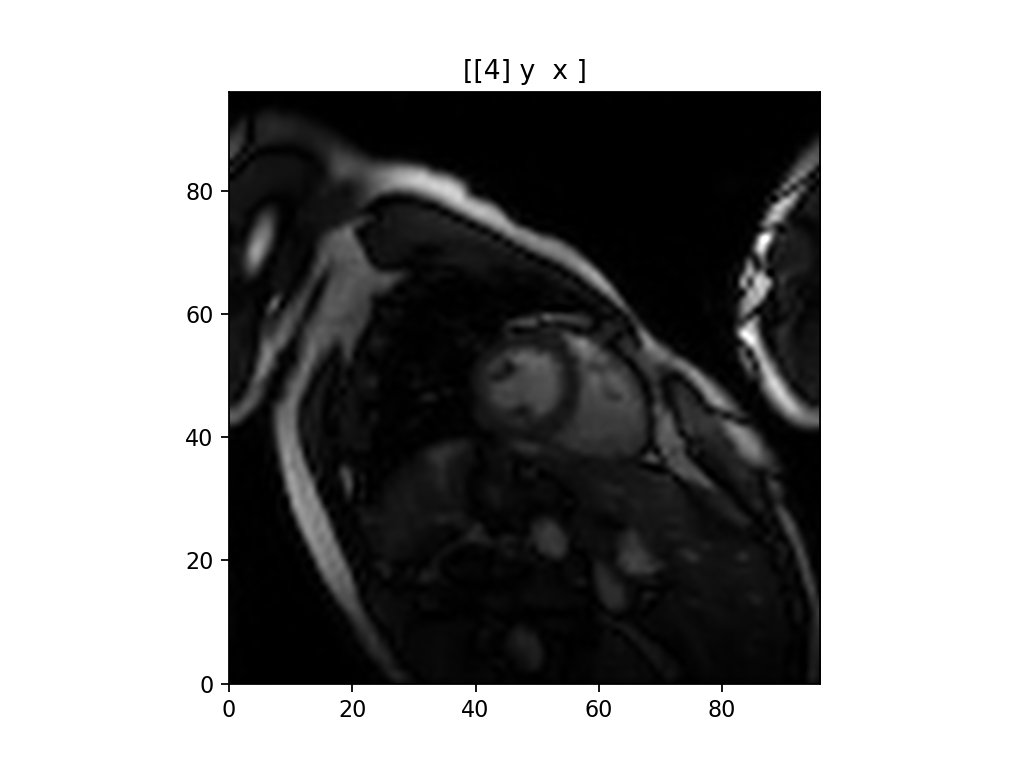

In [48]:
pl.ImagePlot(im_cs_cp)

<IPython.core.display.Javascript object>


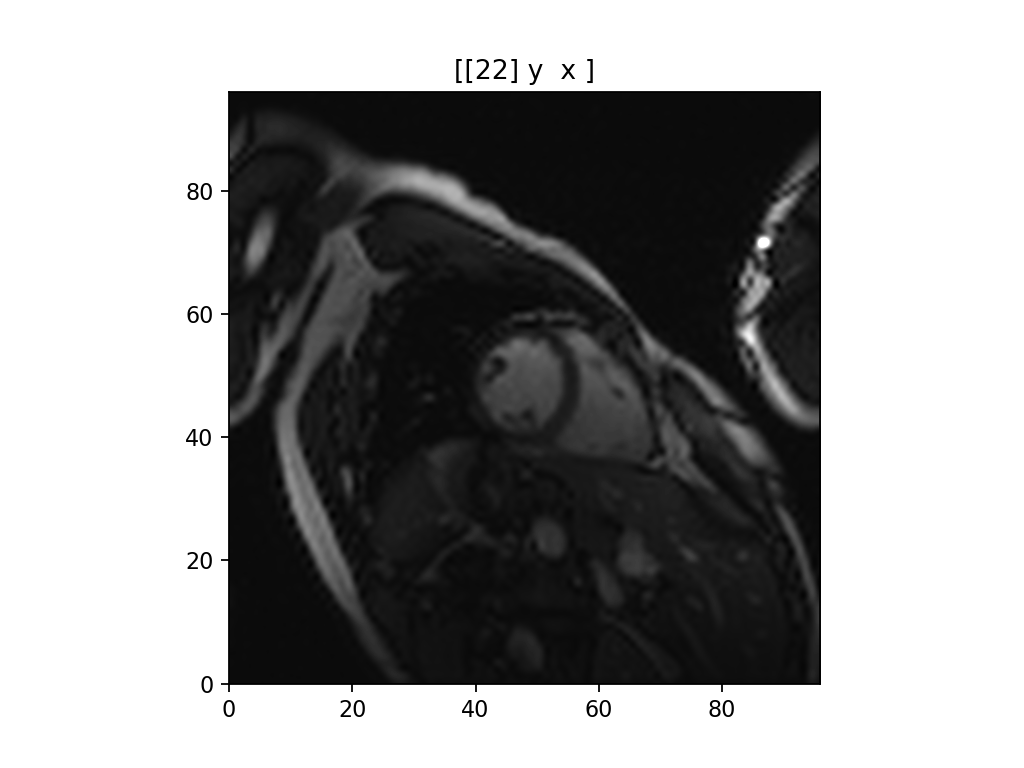

In [11]:
pl.ImagePlot(Im)

<IPython.core.display.Javascript object>


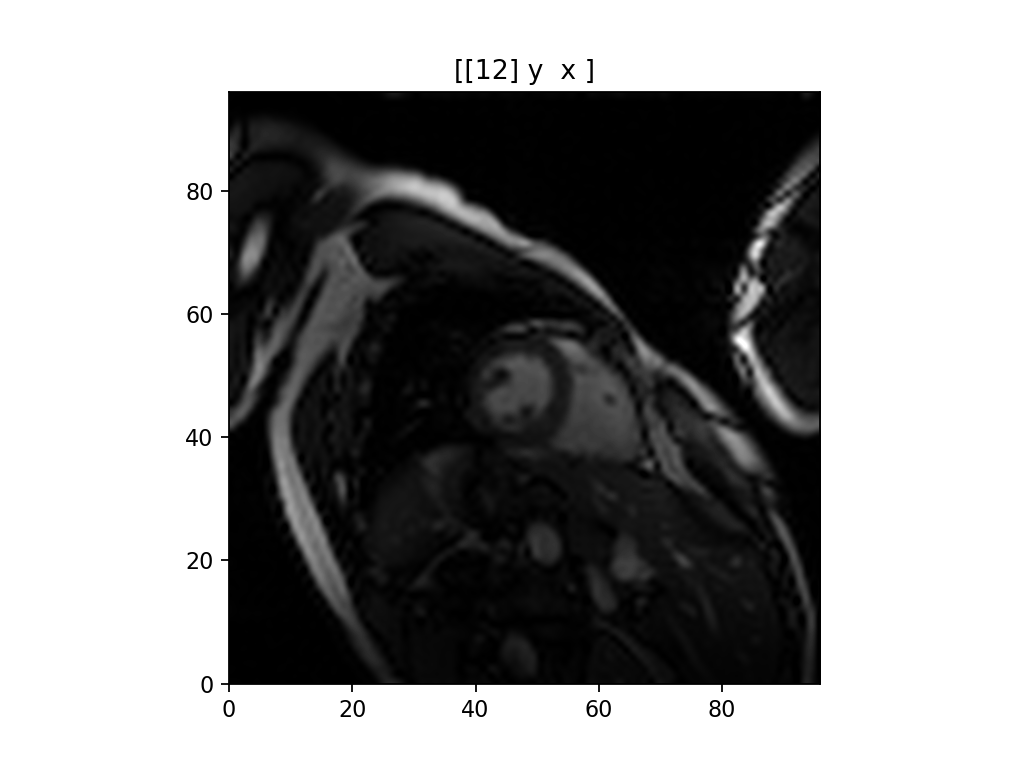

In [12]:
pl.ImagePlot(imgs_lowres)

In [14]:
import bart

In [ ]:
bart.bart()

<IPython.core.display.Javascript object>


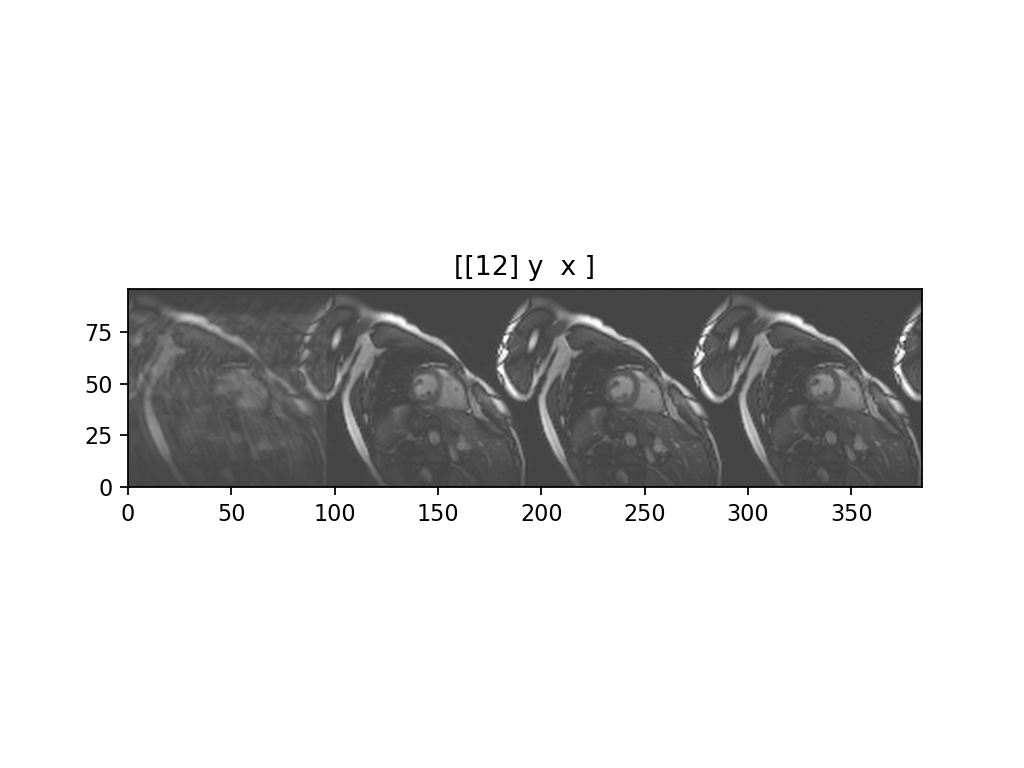

In [72]:
pl.ImagePlot(cp.concatenate((im_lowres,im_cs_cp,imgs_lowres,Im),axis=2))

<IPython.core.display.Javascript object>


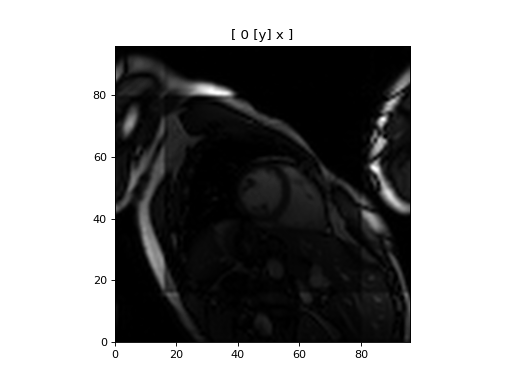

In [78]:
pl.ImagePlot(C)

<IPython.core.display.Javascript object>


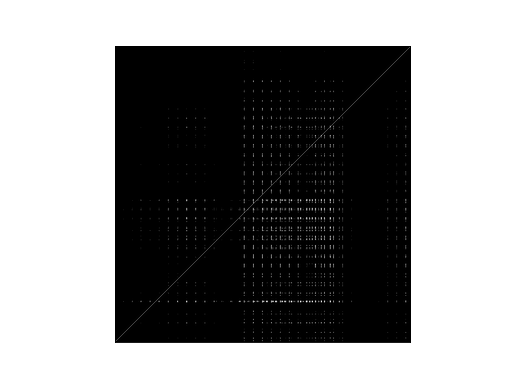

In [77]:
pl.ImagePlot(M)